In [1]:
#| code-summary: Load Packages
#| code-fold: true

# numerical calculation & data frames
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import plotly.express as px

# statistics
import statsmodels.api as sm


In [2]:
#| echo: false
from IPython.display import display, HTML
HTML('<style>.output {flex-direction: row;}</style>')
pd.options.display.notebook_repr_html = False

In [3]:
#| code-summary: Options
#| code-fold: true

# pandas options
pd.options.display.precision = 2
pd.options.display.float_format = '{:.2f}'.format  # pd.reset_option('display.float_format')
pd.options.display.max_rows = 7

# Numpy options
np.set_printoptions(precision = 2, suppress=True)

## MovieLens 1M Dataset
Source: [13. Data Analysis Examples in McKinney's](https://wesmckinney.com/book/data-analysis-examples.html#whetting_movielens)

1990년대 후반에서 2000년대 초반의 영화 평가에 대한 데이터로 3가지 relational data로 이루어져 있고,  
`user_id`, `movie_id`의 keys로 연결되어 있습니다.

- `users`: 유저에 대한 정보
- `ratings`: 평가에 대한 정보
- `movies`: 영화에 대한 정보

In [4]:
users = pd.read_csv("data/users.csv")
users

      user_id gender  age  occupation    zip
0           1      F    1          10  48067
1           2      M   56          16  70072
2           3      M   25          15  55117
...       ...    ...  ...         ...    ...
6037     6038      F   56           1  14706
6038     6039      F   45           0  01060
6039     6040      M   25           6  11106

[6040 rows x 5 columns]

In [5]:
ratings = pd.read_csv("data/ratings.csv")
ratings

         user_id  movie_id  rating  timestamp
0              1      1193       5  978300760
1              1       661       3  978302109
2              1       914       3  978301968
...          ...       ...     ...        ...
1000206     6040       562       5  956704746
1000207     6040      1096       4  956715648
1000208     6040      1097       4  956715569

[1000209 rows x 4 columns]

In [8]:
movies = pd.read_csv("data/movies.csv")
movies.head(8)

    movie_id                    title       genre
0          1         Toy Story (1995)   Animation
1          1         Toy Story (1995)  Children's
2          1         Toy Story (1995)      Comedy
..       ...                      ...         ...
5          2           Jumanji (1995)     Fantasy
6          3  Grumpier Old Men (1995)      Comedy
7          3  Grumpier Old Men (1995)     Romance

[8 rows x 3 columns]

::: {.callout-note}
`movies`의 데이터는 원래 다음과 같이 여러 genres가 | 기호로 나누어 표기되어 있어서 분석을 위해서는 가공할 필요가 있는데, 위 데이터는 가공된 상태임
```python
#    movie_id                               title                        genres
# 0         1                    Toy Story (1995)   Animation|Children's|Comedy
# 1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
# 2         3             Grumpier Old Men (1995)                Comedy|Romance
# ...
```

:::

1. `ratings`과 `users` 데이터를 merge한 후 `user_rating` 데이터셋을 만드세요.

2. 다음과 같이 영화(`movie_id`)별로 남녀(`gender`)에 따른 `rating`의 평균과 그 개수(`count`)을 구해보세요.

```python
#    movie_id gender  mean  count
# 0         1      F  4.19    591
# 1         1      M  4.13   1486
# 2         2      F  3.28    176
# 3         2      M  3.18    525
# 4         3      F  3.07    136
# 5         3      M  2.99    342
...
```

3. 위 데이터로 다음과 같이 평가의 수가 적을수록 평균들의 편차가 커지는 현상을 확인해보세요.

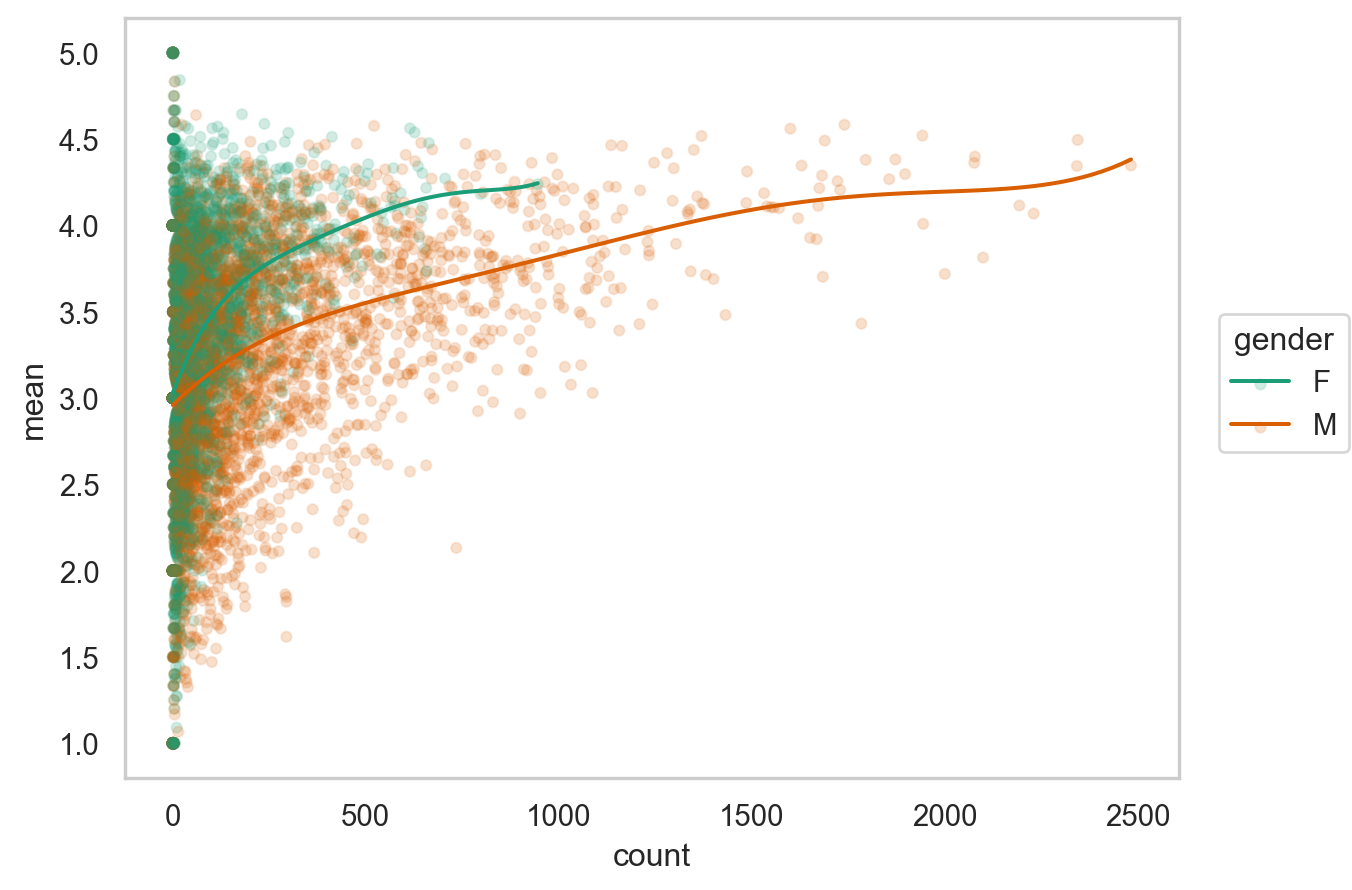

In [40]:
#| echo: false
(
    so.Plot(mean_ratings, x="count", y="mean", color="gender")
    .add(so.Dots(alpha=.1))
    .add(so.Line(), so.PolyFit(5))
    .scale(color="Dark2")
).theme({"axes.facecolor": "w", "axes.edgecolor": ".8"})

4. 3번에서 `seaborn.objects`에 `.limit(x=(0, 500), y=(2.5, 4.5))`을 추가하여 평가 개수(`count`)가 0에서 500사이이고, 평균 rating이 2.5에서 4.5 사이인 것으로 확대해서 보고, 평가 개수가 몇 개 정도부터 남녀의 평가의 차이가 일정하게 되는지 대략 살펴보세요.

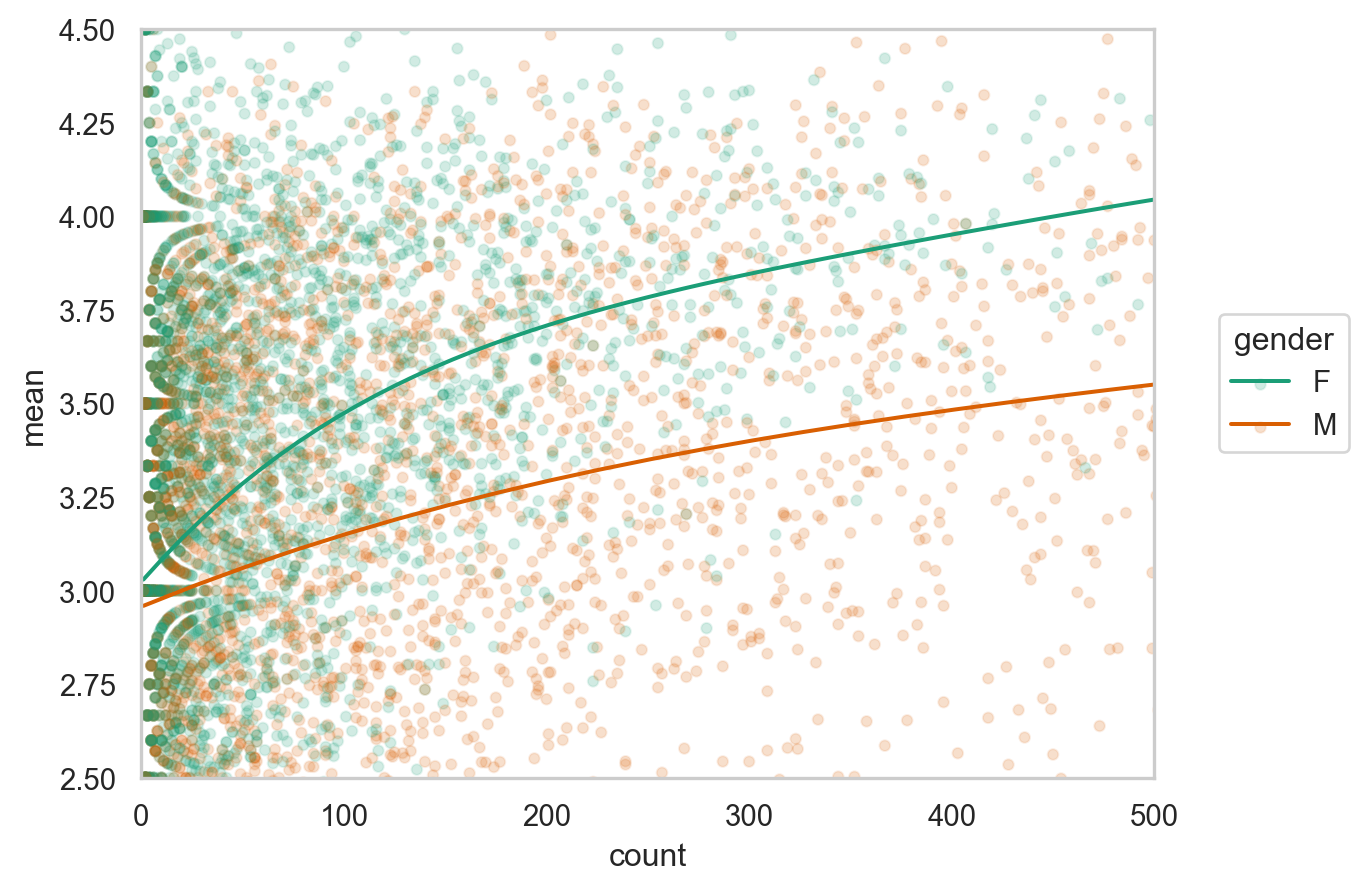

In [61]:
#| echo: false
(
    so.Plot(mean_ratings, x="count", y="mean", color="gender")
    .add(so.Dots(alpha=.1))
    .add(so.Line(), so.PolyFit(5))
    .scale(color="Dark2")
    .limit(x=(0, 500), y=(2.5, 4.5))
    .theme({"axes.facecolor": "w", "axes.edgecolor": ".8"})
)

   
5. 영화별 rating의 갯수를 구한 후 rating이 300개 이상 있는 영화로만 간추려보세요.

6. 이 간추려진 영화로만 2번에서 구한 데이터를 추려보세요.

---

1. `ratings`과 `users` 데이터를 merge한 후 `user_rating` 데이터셋을 만드세요.

In [9]:
user_rating = pd.merge(users, ratings)
user_rating

         user_id gender  age  occupation    zip  movie_id  rating  timestamp
0              1      F    1          10  48067      1193       5  978300760
1              1      F    1          10  48067       661       3  978302109
2              1      F    1          10  48067       914       3  978301968
...          ...    ...  ...         ...    ...       ...     ...        ...
1000206     6040      M   25           6  11106       562       5  956704746
1000207     6040      M   25           6  11106      1096       4  956715648
1000208     6040      M   25           6  11106      1097       4  956715569

[1000209 rows x 8 columns]

2. 다음과 같이 영화(`movie_id`)별로 남녀(`gender`)에 따른 `rating`의 평균과 그 개수(`count`)을 구해보세요.

In [33]:
mean_ratings = (
    user_rating
    .groupby(["movie_id", "gender"])["rating"]
    .agg(["mean", "count"])
    .reset_index()
)
mean_ratings.head(6)

   movie_id gender  mean  count
0         1      F  4.19    591
1         1      M  4.13   1486
2         2      F  3.28    176
3         2      M  3.18    525
4         3      F  3.07    136
5         3      M  2.99    342

3. 다음과 같이 평가의 수가 적을수록 그 편차가 커지는 현상을 확인해보세요.

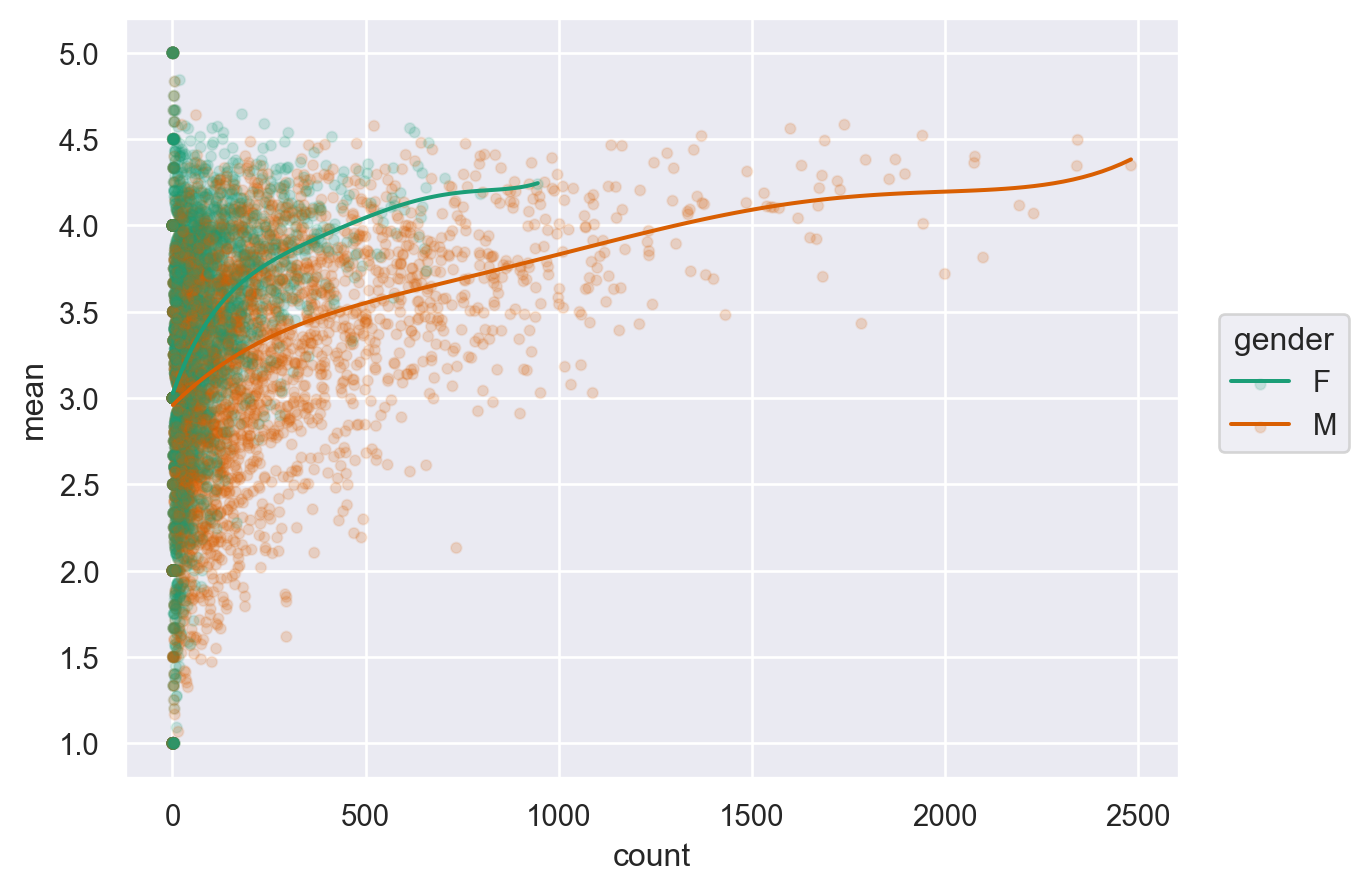

In [62]:
(
    so.Plot(mean_ratings, x="count", y="mean", color="gender")
    .add(so.Dots(alpha=.1))
    .add(so.Line(), so.PolyFit(5))
    .scale(color="Dark2")
)

4. 3번에서 seaborn.objects에 .limit(x=(0, 500), y=(2.5, 4.5))을 추가하여 평가 개수(count)가 0에서 500사이이고, 평균 rating이 2.5에서 4.5 사이인 것으로 확대해서 보고, 평가 개수가 몇 개 정도부터 남녀의 평가의 차이가 일정하게 되는지 대략 살펴보세요.

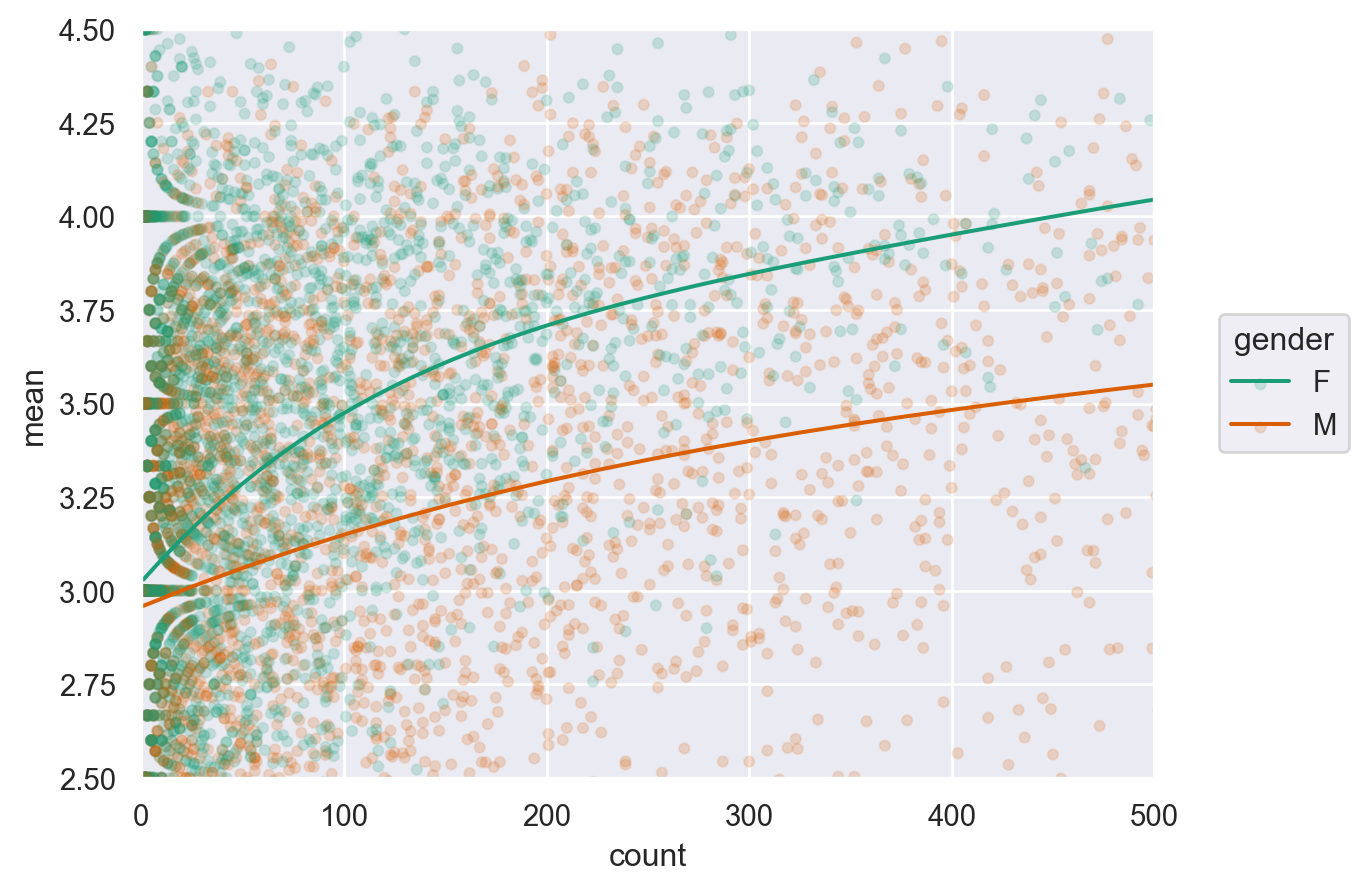

In [63]:
(
    so.Plot(mean_ratings, x="count", y="mean", color="gender")
    .add(so.Dots(alpha=.1))
    .add(so.Line(), so.PolyFit(5))
    .scale(color="Dark2")
    .limit(x=(0, 500), y=(2.5, 4.5))
)

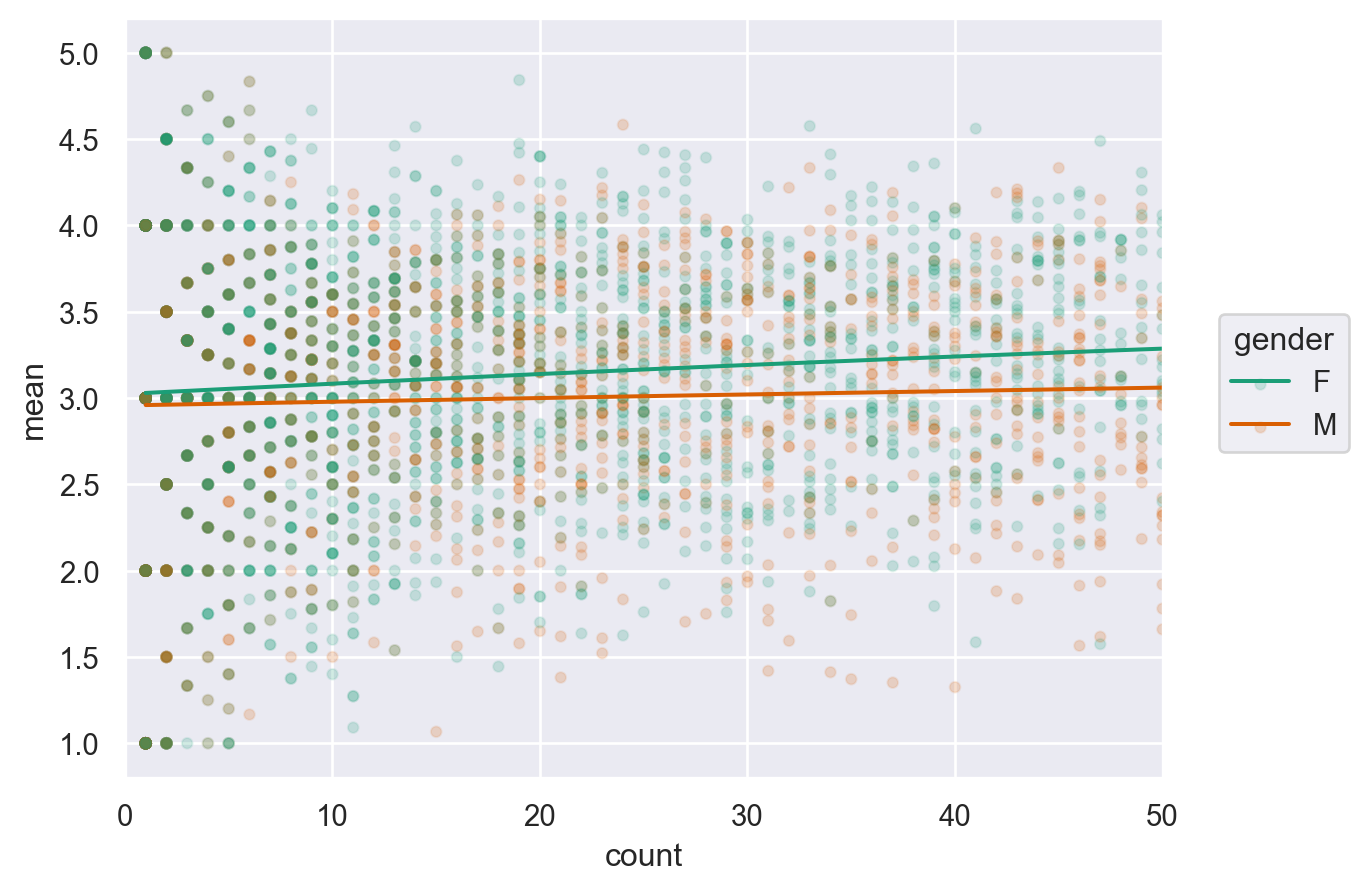

In [71]:
(
    so.Plot(mean_ratings, x="count", y="mean", color="gender")
    .add(so.Dots(alpha=.1))
    .add(so.Line(), so.PolyFit(5))
    .scale(color="Dark2")
    .limit(x=(0, 50))
)

3. 영화별 rating의 갯수를 구한 후 rating이 300개 이상 있는 영화로만 간추려보세요.

In [16]:
popular_movies = (
    user_rating
    .groupby("movie_id")
    .size()
    .reset_index(name="n")
    .query('n >= 300')
)
popular_movies

      movie_id     n
0            1  2077
1            2   701
2            3   478
...        ...   ...
3701      3948   862
3702      3949   304
3705      3952   388

[1058 rows x 2 columns]

4. 이 간추려진 영화로만 2번에서 구한 데이터를 `merge()`를 이용해 추려보세요.

In [20]:
mean_ratings_300 = popular_movies.merge(mean_ratings, how="left")
mean_ratings_300

      movie_id     n gender  rating
0            1  2077      F    4.19
1            1  2077      M    4.13
2            2   701      F    3.28
...        ...   ...    ...     ...
2113      3949   304      M    4.17
2114      3952   388      F    3.76
2115      3952   388      M    3.79

[2116 rows x 4 columns]

In [115]:
ratings2 = ratings.copy()
ratings2["datetime"] = pd.to_datetime(ratings2.pop("timestamp"), unit="s", origin="unix")
ratings2


         user_id  movie_id  rating            datetime
0              1      1193       5 2000-12-31 22:12:40
1              1       661       3 2000-12-31 22:35:09
2              1       914       3 2000-12-31 22:32:48
...          ...       ...     ...                 ...
1000206     6040       562       5 2000-04-25 23:19:06
1000207     6040      1096       4 2000-04-26 02:20:48
1000208     6040      1097       4 2000-04-26 02:19:29

[1000209 rows x 4 columns]

In [120]:
ratings2["dow"] = ratings2["datetime"].dt.day_name().str[:3]

In [121]:
ratings2

         user_id  movie_id  rating            datetime  dow
0              1      1193       5 2000-12-31 22:12:40  Sun
1              1       661       3 2000-12-31 22:35:09  Sun
2              1       914       3 2000-12-31 22:32:48  Sun
...          ...       ...     ...                 ...  ...
1000206     6040       562       5 2000-04-25 23:19:06  Tue
1000207     6040      1096       4 2000-04-26 02:20:48  Wed
1000208     6040      1097       4 2000-04-26 02:19:29  Wed

[1000209 rows x 5 columns]

In [123]:
ratings2["dow"] = pd.Categorical(ratings2["dow"], ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], ordered=True)

In [125]:
ratings2.to_parquet("data/ratings.parquet")

In [126]:
ratings3 = pd.read_parquet("data/ratings.parquet")
ratings3

         user_id  movie_id  rating            datetime  dow
0              1      1193       5 2000-12-31 22:12:40  Sun
1              1       661       3 2000-12-31 22:35:09  Sun
2              1       914       3 2000-12-31 22:32:48  Sun
...          ...       ...     ...                 ...  ...
1000206     6040       562       5 2000-04-25 23:19:06  Tue
1000207     6040      1096       4 2000-04-26 02:20:48  Wed
1000208     6040      1097       4 2000-04-26 02:19:29  Wed

[1000209 rows x 5 columns]

In [127]:
ratings3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 5 columns):
 #   Column    Non-Null Count    Dtype         
---  ------    --------------    -----         
 0   user_id   1000209 non-null  int64         
 1   movie_id  1000209 non-null  int64         
 2   rating    1000209 non-null  int64         
 3   datetime  1000209 non-null  datetime64[ns]
 4   dow       1000209 non-null  category      
dtypes: category(1), datetime64[ns](1), int64(3)
memory usage: 31.5 MB
